In [131]:
#import Libaries
# numpy for handling arrays and matrices
import numpy as np
# panadas for dataframes and data manipulation 
import pandas as pd
# sklearn for machine learning
from sklearn import datasets
# matplotlib for plotting
import matplotlib.pyplot as plt
# seaborn for data visualization
import seaborn as sns

In [132]:
#Read input dataset
iris_data = datasets.load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [133]:
# pass to Dataframe
X = pd.DataFrame(data=iris_data.data, columns=iris_data["feature_names"])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [134]:
y = pd.DataFrame(iris_data.target, columns=['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [135]:
X['target'] = y
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [136]:
#get info about dataset like as missing values, data type, etc
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


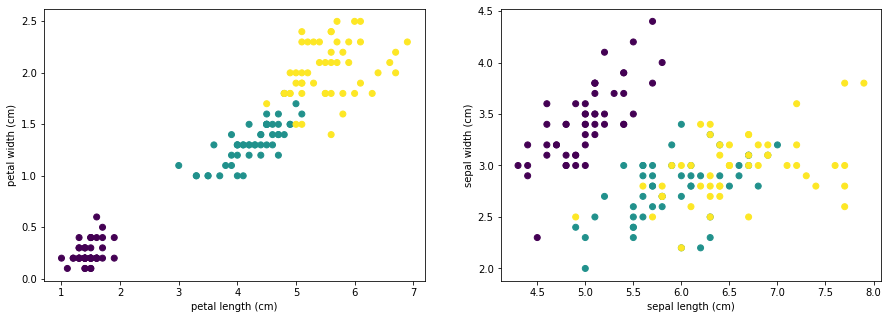

In [137]:
fig = plt.figure(figsize=(15,5))

# scatter between the petal length and petal width
axs1 = fig.add_subplot(122)
axs1.scatter(iris_data.data[:,0], iris_data.data[:,1], c=iris_data.target)
axs1.set_xlabel(iris_data.feature_names[0])
axs1.set_ylabel(iris_data.feature_names[1])

# scatter between the sepal length and sepal width
axs2 = fig.add_subplot(121)
axs2.scatter(iris_data.data[:,2], iris_data.data[:,3], c=iris_data.target)
axs2.set_xlabel(iris_data.feature_names[2])
axs2.set_ylabel(iris_data.feature_names[3])

plt.show()

### detected outliers mathematically 

In [138]:
# check outliers using the IQR interquartile range to detect outliers
def find_outliers_IQR(df):
    df = sorted(df)
    q1, q3= np.percentile(df,[25,75])
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return len([x for x in df if x < lower or x > upper])

find_outliers_IQR(X['sepal length (cm)']), find_outliers_IQR(X['sepal width (cm)']), find_outliers_IQR(X['petal length (cm)']), find_outliers_IQR(X['petal width (cm)'])

(0, 4, 0, 0)

#### detect missing values

In [139]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### detect duplicate values and remove them

In [140]:
# with duplicates
# X_dup = iris_data.data
# X_dup = pd.DataFrame(X_dup, columns=iris_data["feature_names"])
# y_dup = pd.DataFrame(iris_data.target, columns=['target'])
# X_dup, y_dup

In [141]:
X = X.drop_duplicates()
y = X['target']
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### replace numeric values of target (y) with categorical values for plotting

In [142]:
X_yCatego = X.copy()
for i in range(len(iris_data.target_names)):
    X_yCatego['target'].replace(i, iris_data.target_names[i] , inplace=True)

X_yCatego

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [143]:
#find number of unique classes
np.unique(X_yCatego['target']), len(np.unique(y))

(array(['setosa', 'versicolor', 'virginica'], dtype=object), 3)

#### check balance of classes 

In [144]:
X_yCatego['target'].value_counts()

setosa        50
versicolor    50
virginica     49
Name: target, dtype: int64

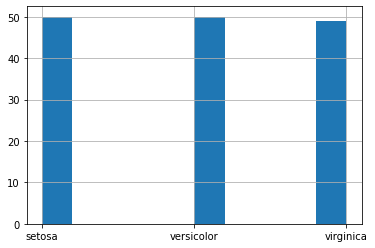

In [145]:
# Data balance usually reflects an equal distribution of classes within a dataset

plt.hist(X_yCatego['target'], bins=10, label='Class Distribution')
plt.grid();

#approximately dataset balanced  where 50 of the data in each class except for the last class (virginica) 49

#### plotting the data by seaborn visualization

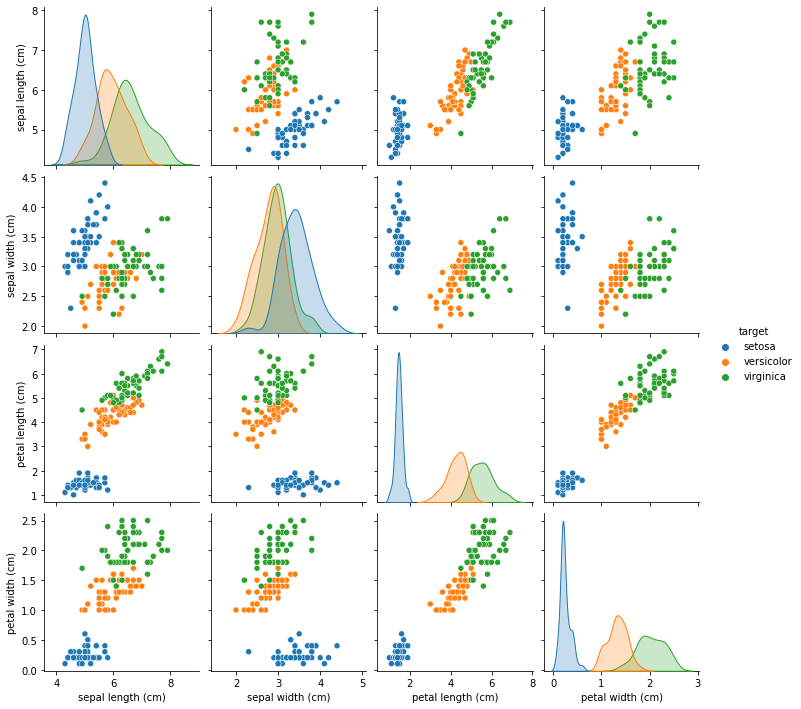

In [146]:
# Visualization visual inspection of dataset
sns.pairplot(data=X_yCatego, hue='target');

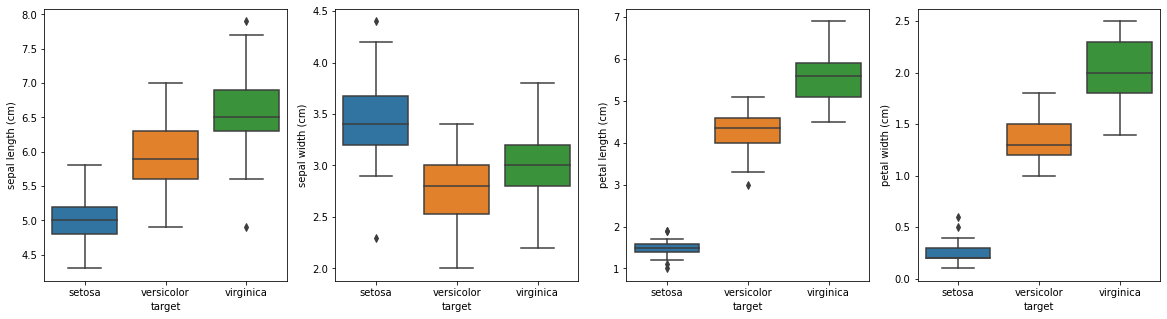

In [160]:
#Box Plot for each input variable
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i in range(4):
    sns.boxplot(data=X_yCatego, x='target', y=X.columns[i], ax=ax[i]);

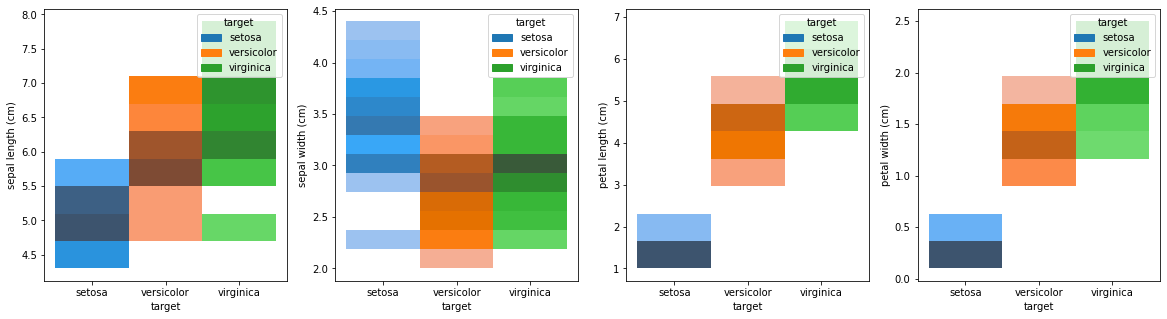

In [148]:
#Histogram Plot for each input variable
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i in range(4):
    sns.histplot(data=X_yCatego, x='target', y=X.columns[i], ax=ax[i],hue='target');

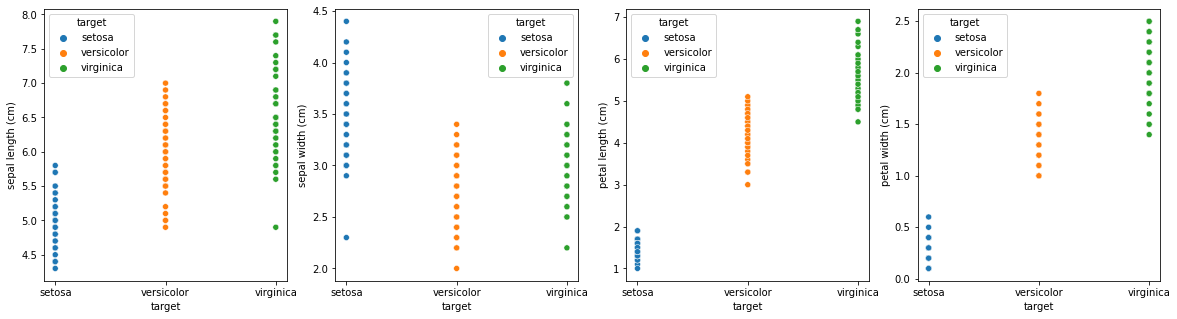

In [149]:
#scatter Plot for two input variables
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i in range(4):
    sns.scatterplot(data=X_yCatego, x='target', y=X.columns[i], ax=ax[i], hue='target');

### describe data

In [150]:
#Statistical Summary after cleaning
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### separate data into features X and target y 

In [151]:
y, X = X.iloc[:,-1], X.iloc[:,0:4] 

#### Modeling the data and predicting the target variable

In [152]:
#Create Training and Test Sets and Apply Scaling
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale the data (training set) to normalize it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

test_score = logreg.score(X_test, y_test)
train_score = logreg.score(X_train, y_train)

print(f'Accuracy of Logistic regression classifier on training set: {train_score:.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {test_score:.2f}')

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.92


In [154]:
#Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

test_score = clf.score(X_test, y_test)
train_score = clf.score(X_train, y_train)

print(f'Accuracy of Decision Tree classifier on training set: {train_score:.2f}')
print(f'Accuracy of Decision Tree classifier on test set: {test_score:.2f}')

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


In [156]:
#K nearest nighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train)

print(f'Accuracy of K-NN classifier on training set: {train_score:.2f}')
print(f'Accuracy of K-NN classifier on test set: {test_score:.2f}')

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.95


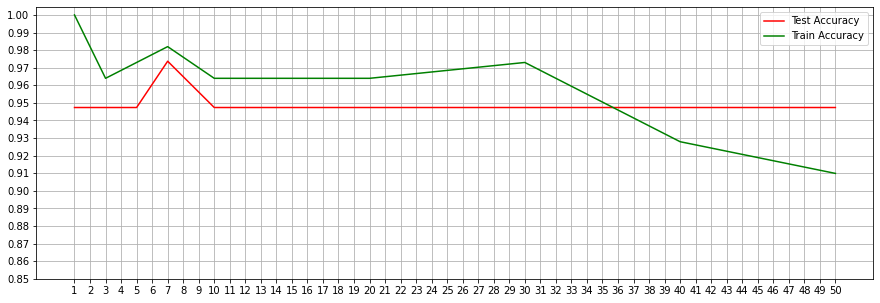

In [157]:
k_list = [ 1, 3, 5, 7, 10, 20, 30, 40, 50]
test_list = []
train_list = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_list.append(knn.score(X_test, y_test))
    train_list.append(knn.score(X_train, y_train))

plt.figure(figsize=(15,5))
plt.plot(k_list, test_list, label='Test Accuracy', c='r')
plt.plot(k_list, train_list, label='Train Accuracy',c='g')
plt.xticks(np.arange(1, 51, step=1))
plt.yticks(np.arange(0.85, 1.00, step=0.01))
plt.legend()
plt.grid();

In [158]:
# SVC (Support Vector Machine) classifier
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

print(f'Accuracy of SVM classifier on training set: {train_score:.2f}')
print(f'Accuracy of SVM classifier on test set: {test_score:.2f}')

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.95


In [159]:
#Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

train_score = gnb.score(X_train, y_train)
test_score = gnb.score(X_test, y_test)

print(f'Accuracy of GNB classifier on training set: {train_score:.2f}')
print(f'Accuracy of GNB classifier on test set: {test_score:.2f}')

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.95
